In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%reload_ext autoreload
%autoreload 2

# <span style='color:lightgreen'>Logs

### CALMIP logs

In [6]:
cp_logs_df = pd.read_csv('./logs/calmip_logs.csv', index_col = 0)
cp_logs_df['fit_time'] = cp_logs_df['fit_time'].astype(int)
cp_logs_df[['model','features','input_features','seq_len', 'pred_len','lstm_layers','e_layers','d_model', 'd_layers', 'd_ff',
       'dropout', 'learning_rate', 'train_epochs', 'epoch','fde','rmse','nb_params', 'fit_time']].sort_values('fde')

,model,features,input_features,seq_len,pred_len,lstm_layers,e_layers,d_model,d_layers,d_ff,dropout,learning_rate,train_epochs,epoch,fde,rmse,nb_params,fit_time
14,iTransformer,S,A,32,32,2,2,256,1,512,0.20,0.0010,48,43,2.945513,1.679086,1071392,1246
16,TimesNet,S,A,32,32,2,2,256,1,512,0.20,0.0010,48,41,2.976781,1.674941,151258689,5197
0,LSTM,MS,V,32,32,2,2,256,1,512,0.20,0.0010,36,4,2.999465,1.800995,822529,302
19,Transformer,MS,A,32,32,2,2,256,1,512,0.20,0.0005,48,7,3.005753,1.747075,4492801,564
12,DLinear,S,A,32,32,2,2,256,1,512,0.20,0.0010,48,43,3.018873,1.695828,2112,576
3,LSTM,MS,A,32,32,2,2,256,1,512,0.10,0.0010,48,4,3.019928,1.836484,853249,308
13,PatchTST,S,A,32,32,2,2,256,1,512,0.20,0.0010,48,6,3.047919,1.780459,2372129,611
15,Nonstationary_Transformer,S,A,32,32,2,2,256,1,512,0.20,0.0010,48,7,3.061288,1.753256,4484929,1193
10,LSTM,S,A,32,32,2,2,256,1,512,0.20,0.0010,48,37,3.061470,1.793898,791809,777
18,ST_GAT,MS,A,32,32,2,1,64,2,64,0.10,0.0010,48,11,3.150055,1.835567,236064,38758


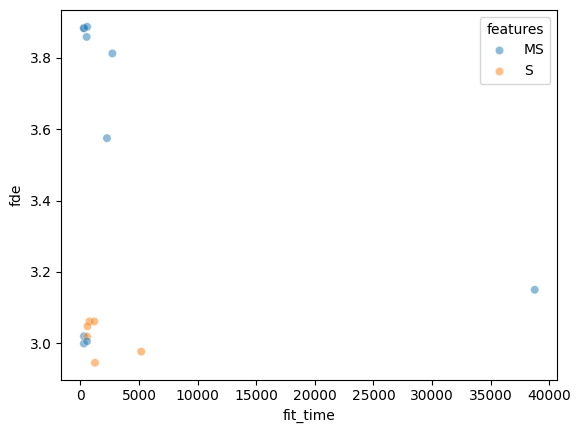

In [7]:
sns.scatterplot( data = cp_logs_df, 
                x = 'fit_time', y='fde', alpha = 0.5,
                hue= 'features');

### Local LT_DF

In [8]:
model_id = 'USC_32_32'
lt_logs_df = pd.read_csv('./logs/long_term_forecast.csv', index_col = 0)
lt_logs_df['epoch'] = lt_logs_df['epoch'].fillna(-1).astype(int)
lt_logs_df['fit_time'] = np.round(lt_logs_df['fit_time'],2)
start_index = 232
query = (lt_logs_df['model_id'] == model_id)&(lt_logs_df['fde'].isna() == False)&(lt_logs_df.index >= start_index)
lt_logs_df[query][['model','features','input_features','seq_len', 'pred_len','lstm_layers','e_layers','d_model', 'd_layers', 'd_ff',
       'dropout', 'learning_rate', 'train_epochs', 'epoch','fde','rmse','nb_params', 'fit_time']].sort_values('fde').head(20)

,model,features,input_features,seq_len,pred_len,lstm_layers,e_layers,d_model,d_layers,d_ff,dropout,learning_rate,train_epochs,epoch,fde,rmse,nb_params,fit_time
306,ST_GAT,MS,A,32,32,2,1,32,1,64,0.10,0.0010,36,19,2.824565,1.696490,62400,1123.80
276,SABFormer,MS,A,32,32,2,2,256,1,512,0.10,0.0010,36,17,2.849299,1.627774,6056608,1614.22
301,ST_GAT,MS,A,32,32,1,1,64,1,128,0.10,0.0010,36,8,2.871921,1.629723,201952,9851.04
302,ST_GAT,MS,A,32,32,1,1,64,1,128,0.25,0.0010,36,8,2.884434,1.645133,201952,5529.70
309,ST_GAT,MS,A,32,32,2,1,32,2,32,0.10,0.0010,36,21,2.920432,1.667500,60640,6802.48
308,ST_GAT,MS,A,32,32,1,1,128,2,256,0.10,0.0010,36,13,2.921957,1.661680,839840,6275.89
238,iTransformer,S,A,32,32,2,2,256,1,512,0.10,0.0010,36,35,2.938396,1.653507,1071392,114.67
310,ST_GAT,MS,A,32,32,2,2,64,2,64,0.10,0.0010,36,20,2.941844,1.726206,303328,7333.92
250,Transformer,MS,A,32,32,2,1,128,1,128,0.25,0.0010,36,7,2.946575,1.711822,1589377,306.81
234,Transformer,S,A,32,32,2,2,256,1,512,0.10,0.0010,36,34,2.954257,1.663159,4446721,298.62


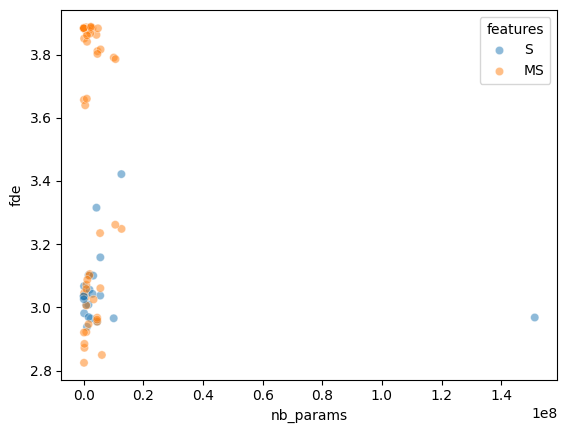

In [32]:
sns.scatterplot( data = lt_logs_df[query], 
                x = 'nb_params', y='fde', alpha = 0.5,
                hue= 'features');

### Scoring baselines

In [33]:
from types import SimpleNamespace
from data_provider.data_factory import data_provider

usc_args = SimpleNamespace(**lt_logs_df.loc[207].to_dict())
usc_args.scale = False
uscds, uscdl = data_provider(args= usc_args, flag = 'test', )
uscds.data_x.shape, uscds.data_y.shape

test 4233


((4233, 32, 1), (4233, 32, 1))

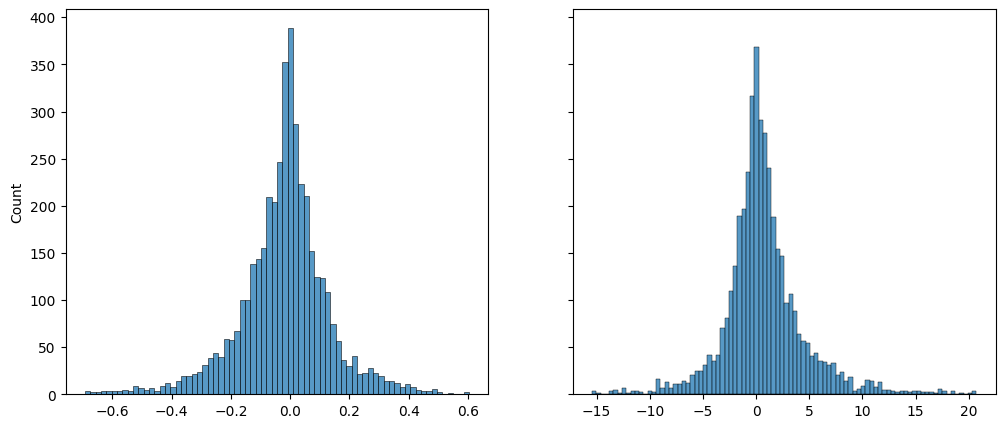

In [34]:
tmp = uscds.data_x[:,-1,0] -  uscds.data_y[:,0,0]
fig, axs = plt.subplots(1,2,figsize = (12,5), sharey=True)
sns.histplot(tmp, ax = axs[0]);
sns.histplot(uscds.data_y[:,-1,0], ax = axs[1]);


In [35]:
uscds.data_x[0,-5:,0] , uscds.data_y[0,:5,0]

(array([-0.5815458 , -0.4777832 , -0.3362279 , -0.13446379,  0.        ],
       dtype=float32),
 array([0.17934847, 0.41184092, 0.6160221 , 0.8721256 , 1.0302544 ],
       dtype=float32))

In [36]:
x,y = uscds.data_x, uscds.data_y

In [37]:
ind = 0
x[ind,-5:,0], y[ind,usc_args.label_len:usc_args.label_len+5,0]

(array([-0.5815458 , -0.4777832 , -0.3362279 , -0.13446379,  0.        ],
       dtype=float32),
 array([2.177392 , 2.1703014, 2.1655731, 2.1820927, 2.18682  ],
       dtype=float32))

In [38]:
ss_fde = np.sqrt(np.mean(uscds.data_y[:,-1,0]**2))
ss_rmse = np.sqrt(np.mean(uscds.data_y[:,:,0]**2))
ss_fde, ss_rmse

(3.8998787, 2.452531)

In [39]:
bl_cv_delta = uscds.data_x[:,-1,0] - uscds.data_x[:,-2,0]
bl_cv_pred = np.repeat(uscds.data_x[:,-1,0].reshape(-1,1,1), y.shape[1], axis=1)
for i in range(y.shape[1]):
    bl_cv_pred[:,i,0] = (i+1) * bl_cv_delta 
cv_fde = np.sqrt(np.mean( (uscds.data_y[:,-1,0] - bl_cv_pred[:,-1,0])**2 ))
cv_rmse = np.sqrt(np.mean( (uscds.data_y[:,:,0] - bl_cv_pred[:,:,0])**2 ))
cv_fde, cv_rmse

(3.9323, 2.0943015)

In [40]:
bls = [{'model':'Baseline - StandStill', 'features':'S','fde':ss_fde, 'rmse':ss_rmse},
       {'model':'Baseline - ConstantVelocity', 'features':'S','fde':cv_fde, 'rmse': cv_rmse}]

### Comparison

In [41]:
tmp_df = lt_logs_df[query][['model','features','fde','rmse']].copy().sort_values(by = 'fde')
tmp_df['dupl'] = tmp_df[['model','features']].duplicated()
tmp_df=tmp_df[tmp_df['dupl'] == False]


In [42]:
comp = pd.concat([tmp_df.drop(columns = 'dupl'), pd.DataFrame(bls)]).reset_index(drop=True)
comp.sort_values(by = 'fde').round(3)

,model,features,fde,rmse
0,ST_GAT,MS,2.825,1.696
1,SABFormer,MS,2.849,1.628
2,iTransformer,S,2.938,1.654
3,Transformer,MS,2.947,1.712
4,Transformer,S,2.954,1.663
5,PatchTST,S,2.965,1.677
6,TimesNet,S,2.965,1.670
7,Nonstationary_Transformer,S,2.969,1.694
8,LSTM,MS,3.006,1.788
9,DLinear,S,3.026,1.701


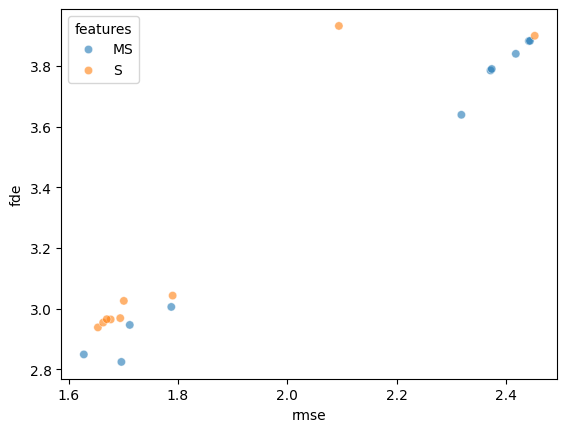

In [43]:
sns.scatterplot(data=comp, x = 'rmse', y = 'fde', hue = 'features', alpha = 0.6);